## Softmax

In [ ]:
import numpy as np

In [ ]:
vector = np.array([11231, 999, 123142])

In [ ]:
vector = np.array([-10, 10, 24])

In [ ]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [ ]:
softmax(vector)

## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

In [ ]:
import jieba
import codecs
def cut_words(sentence):
    #print sentence
    return " ".join(jieba.cut(sentence)).encode('utf-8')
f=codecs.open('C:\\Users\\HP\\extracted\\AA\\zh_wiki_00','r',encoding="utf8")
target = codecs.open("C:\\Users\\HP\\extracted\\AA\\zh_wiki_00.text", 'w',encoding="utf8")
print ('open files')
line_num=1
line = f.readline()
while line:
    print('---- processing ', line_num, ' article----------------')
    line_seg = " ".join(jieba.cut(line))
    target.writelines(line_seg)
    line_num = line_num + 1
    line = f.readline()
f.close()
target.close()

In [2]:
from gensim.models import Word2Vec

from gensim.models.word2vec import LineSentence

from gensim.test.utils import common_texts, get_tmpfile

# inp为输入语料

inp =open( 'C:\\Users\\HP\\extracted\\AA\\zh_wiki_00.text','r',encoding="utf8")

sentences = LineSentence(inp)

#path = get_tmpfile("word2vec.model")  # 创建临时文件

model = Word2Vec(sentences, size=100, window=5, min_count=500)

#model.save("word2vec.model")


In [37]:
 model.wv.most_similar("哥哥")

[('姐姐', 0.8839885592460632),
 ('弟弟', 0.8651394844055176),
 ('妹妹', 0.8577917814254761),
 ('母亲', 0.8143501281738281),
 ('父亲', 0.8063064813613892),
 ('儿子', 0.7828035950660706),
 ('女儿', 0.7719936370849609),
 ('叔叔', 0.7584494352340698),
 ('小时候', 0.7310088276863098),
 ('兄长', 0.7281851768493652)]

In [39]:
 model.wv.similarity("哥哥","男孩")

0.53872275

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


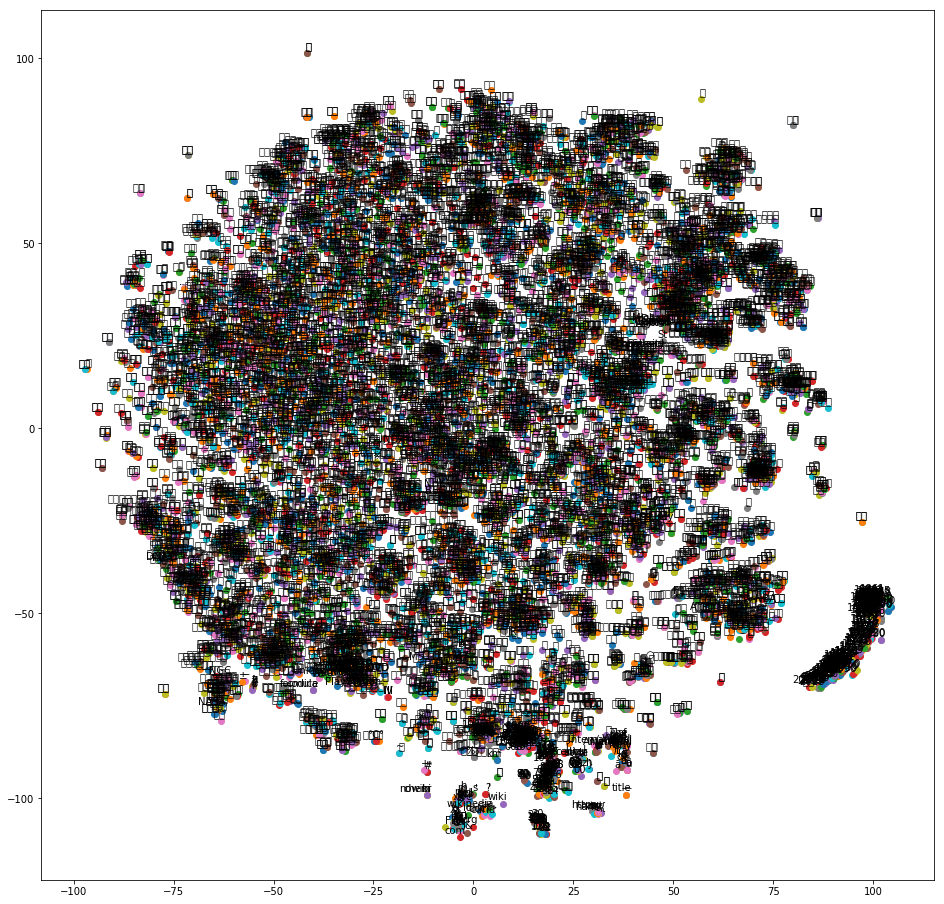

In [9]:
tsne_plot(model)

## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。